In [ ]:
import pandas as pd

In [ ]:
cont = pd.read_csv('https://bit.ly/31B56KB')
cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Contaminacion_SO2  41 non-null     int64  
 1   Temperatura        41 non-null     float64
 2   Fabricas           41 non-null     int64  
 3   Habitantes         41 non-null     int64  
 4   Velocidad_viento   41 non-null     float64
 5   Lluvia             41 non-null     float64
 6   Dias_Lluvia        41 non-null     int64  
dtypes: float64(3), int64(4)
memory usage: 2.4 KB


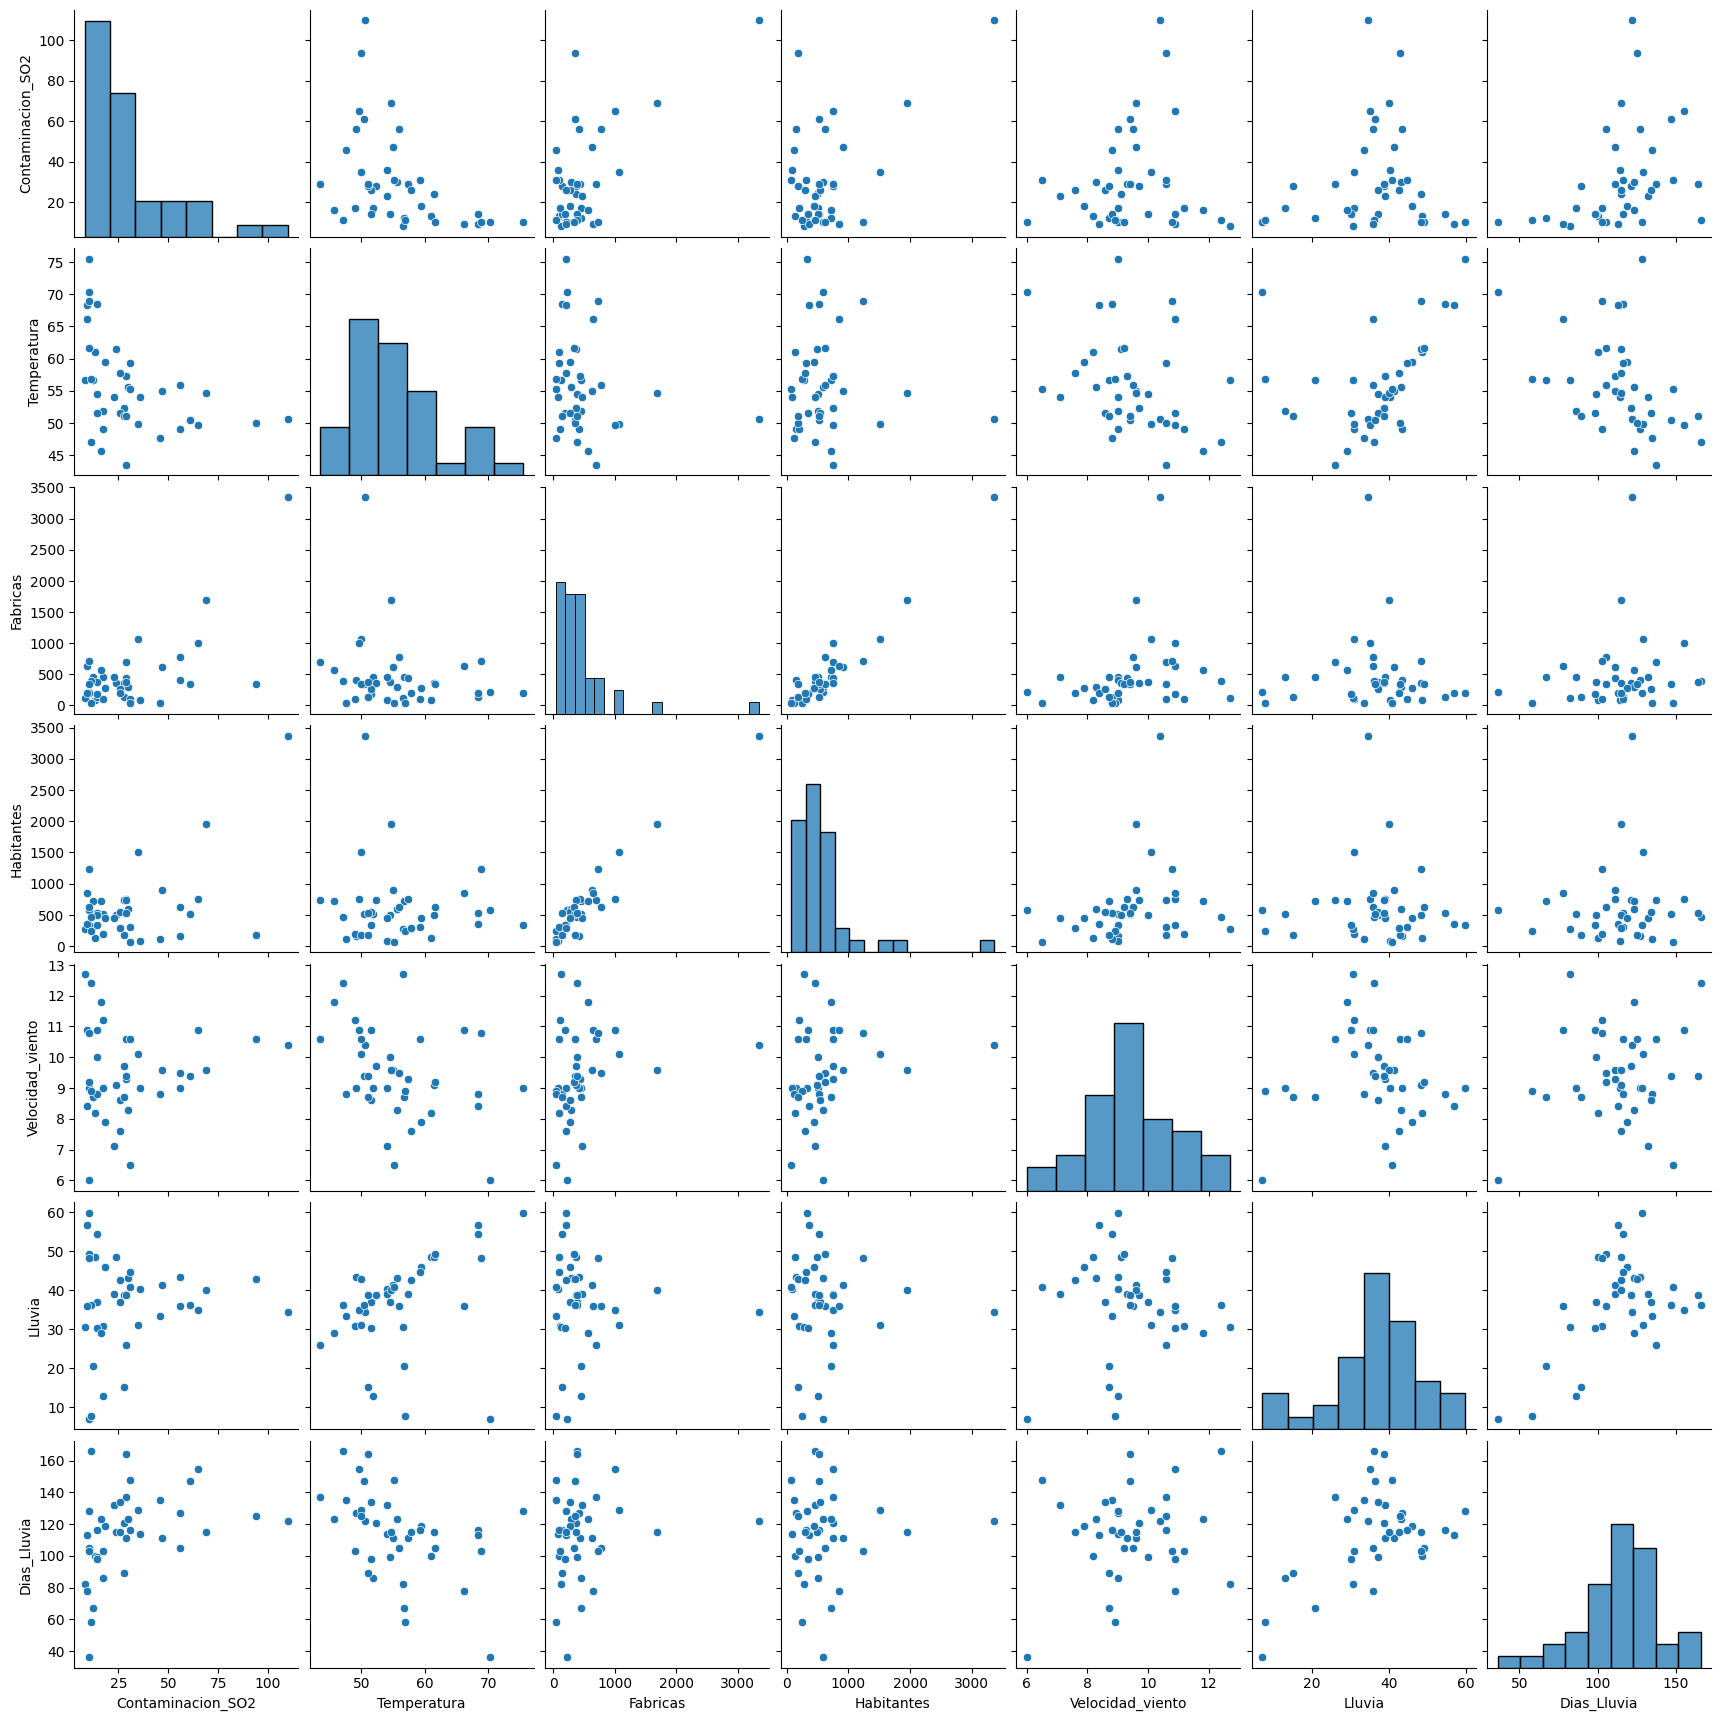

In [ ]:
import seaborn as sns
#En la diagonal estan las distribuciones de cada variable
#Ingerencia humana, los datos no se ajustan a una distribucion normal
sns.pairplot(cont)

((array([-2.12570479, -1.74291212, -1.51528984, -1.34678628, -1.20968671,
         -1.09219094, -0.98810906, -0.89376191, -0.80676941, -0.72549338,
         -0.64875081, -0.57565335, -0.50551158, -0.43777469, -0.37199083,
         -0.30778002, -0.24481487, -0.18280651, -0.12149384, -0.06063494,
          0.        ,  0.06063494,  0.12149384,  0.18280651,  0.24481487,
          0.30778002,  0.37199083,  0.43777469,  0.50551158,  0.57565335,
          0.64875081,  0.72549338,  0.80676941,  0.89376191,  0.98810906,
          1.09219094,  1.20968671,  1.34678628,  1.51528984,  1.74291212,
          2.12570479]),
  array([  8,   9,   9,  10,  10,  10,  10,  11,  11,  12,  13,  14,  14,
          14,  16,  17,  17,  18,  23,  24,  26,  26,  28,  28,  29,  29,
          29,  30,  31,  31,  35,  36,  46,  47,  56,  56,  61,  65,  69,
          94, 110])),
 (21.75571965973272, 30.04878048780488, 0.8990926959181523))

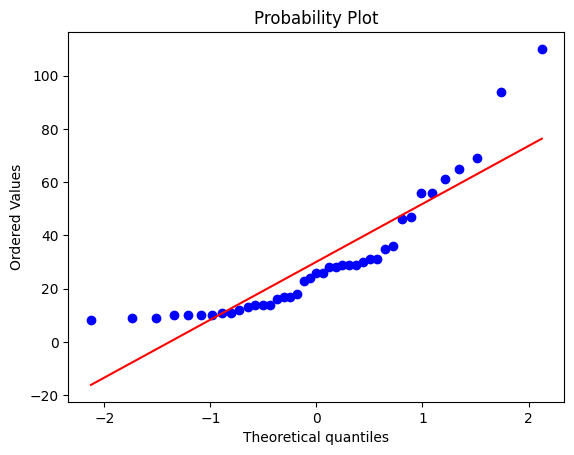

In [ ]:
import scipy.stats as st
import pylab
st.probplot(cont.Contaminacion_SO2,dist='norm',plot =pylab)

In [ ]:
#menor que 0.5
from scipy.stats import shapiro
_,p_value = shapiro(cont.Contaminacion_SO2)
print(f'p_value = {p_value}')

p_value = 9.723376400158156e-06


((array([-2.12570479, -1.74291212, -1.51528984, -1.34678628, -1.20968671,
         -1.09219094, -0.98810906, -0.89376191, -0.80676941, -0.72549338,
         -0.64875081, -0.57565335, -0.50551158, -0.43777469, -0.37199083,
         -0.30778002, -0.24481487, -0.18280651, -0.12149384, -0.06063494,
          0.        ,  0.06063494,  0.12149384,  0.18280651,  0.24481487,
          0.30778002,  0.37199083,  0.43777469,  0.50551158,  0.57565335,
          0.64875081,  0.72549338,  0.80676941,  0.89376191,  0.98810906,
          1.09219094,  1.20968671,  1.34678628,  1.51528984,  1.74291212,
          2.12570479]),
  array([ 6. ,  6.5,  7.1,  7.6,  7.9,  8.2,  8.3,  8.4,  8.6,  8.7,  8.7,
          8.8,  8.8,  8.9,  9. ,  9. ,  9. ,  9. ,  9.1,  9.2,  9.3,  9.4,
          9.4,  9.5,  9.6,  9.6,  9.7, 10. , 10.1, 10.4, 10.6, 10.6, 10.6,
         10.8, 10.9, 10.9, 10.9, 11.2, 11.8, 12.4, 12.7])),
 (1.4560644307654633, 9.44390243902439, 0.9886501660249299))

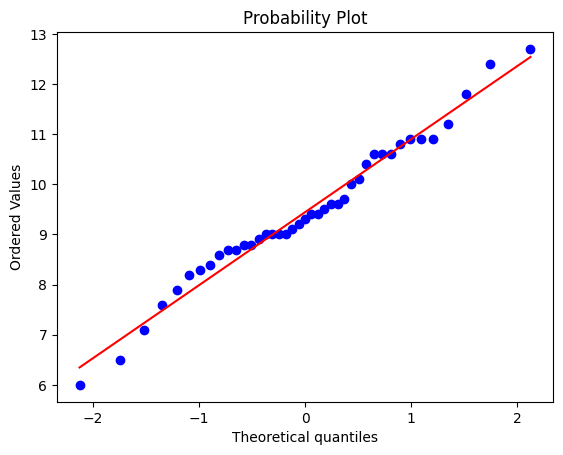

In [ ]:
import scipy.stats as st
import pylab
st.probplot(cont.Velocidad_viento,dist='norm',plot =pylab)

In [ ]:
#mayor que 0.5
from scipy.stats import shapiro
_,p_value = shapiro(cont.Velocidad_viento)
print(f'p_value = {p_value}')

p_value = 0.6972579783041465


In [ ]:
import numpy as np
data = np.random.randn(5000)*20+20

In [ ]:
import numpy as np
def find_anomalies(data,cut=3):
  anomalies = []
  data_std = np.std(data)
  data_mean = np.mean(data)
  anomaly_cut = cut*data_std
  low_lim = data_mean - anomaly_cut
  upper_lim = data_mean + anomaly_cut
  #Agregar anomalias
  for d in data:
    if d > upper_lim or d < low_lim:
      anomalies.append(d)
  return anomalies


In [ ]:
len(find_anomalies(data))

10

In [ ]:
find_anomalies(data)

[80.00012701003448,
 85.06390369274962,
 -53.23607312765742,
 -51.12925803768236,
 -45.00503316830131,
 88.38990290628665,
 -50.325634980909385,
 86.41605467531453,
 83.58818055787293,
 -69.30848696562266]

<Axes: >

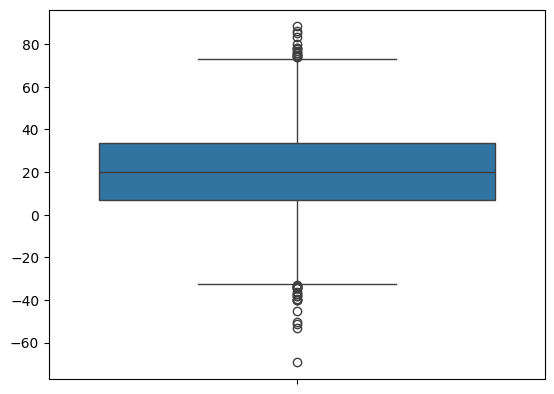

In [ ]:
import seaborn as sns
sns.boxplot(data)


dict

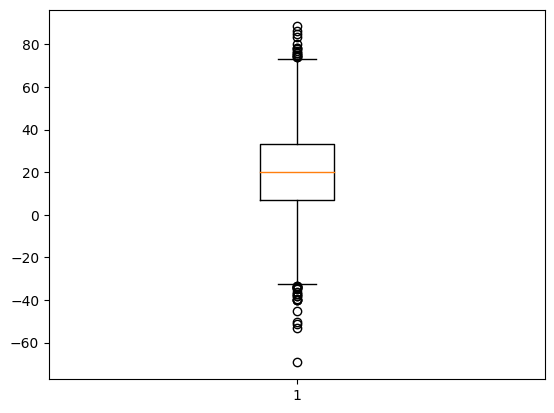

In [ ]:
import matplotlib.pyplot as plt
bp=plt.boxplot(x=data)
type(bp)

In [ ]:
bp['fliers'][0].get_data()[1].shape #Cuantos hay en fliers, valores atipicos obtenidos via matplotlib

(38,)

In [ ]:
bp['fliers'][0].get_data()[1] #Cuantos hay en fliers, valores atipicos obtenidos via matplotlib

array([-33.66686893, -37.04078943, -53.23607313, -33.47188374,
       -39.60749102, -33.903005  , -38.12824651, -51.12925804,
       -45.00503317, -36.30951638, -40.18978727, -34.48914302,
       -50.32563498, -34.59436999, -33.17984174, -39.88136107,
       -34.26952818, -37.2343265 , -69.30848697, -39.96004433,
       -33.74770893, -37.94043125,  74.56022132,  78.06831285,
        77.74379897,  78.07674719,  80.00012701,  85.06390369,
        75.78240994,  74.81189517,  74.06656506,  75.76677295,
        88.38990291,  86.41605468,  73.93766939,  83.58818056,
        76.87679233,  75.06964671])

In [ ]:
bp.keys() #Todo lo que qesta disponible

dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])

In [ ]:
url = ' https://bit.ly/47bBIcL'
stocks = pd.read_csv(url,header = 'infer')
stocks.head(3)

,Date,MSFT,F,BAC
0,1/3/2007,29.860001,7.51,53.330002
1,1/4/2007,29.809999,7.70,53.669998
2,1/5/2007,29.639999,7.62,53.240002


In [ ]:
stocks =stocks.drop(columns=['Date'])
#stocks.drop(['Date'],axis=1,inplace=True)
stocks.head(3)

,MSFT,F,BAC
0,29.860001,7.51,53.330002
1,29.809999,7.70,53.669998
2,29.639999,7.62,53.240002


<Axes: >

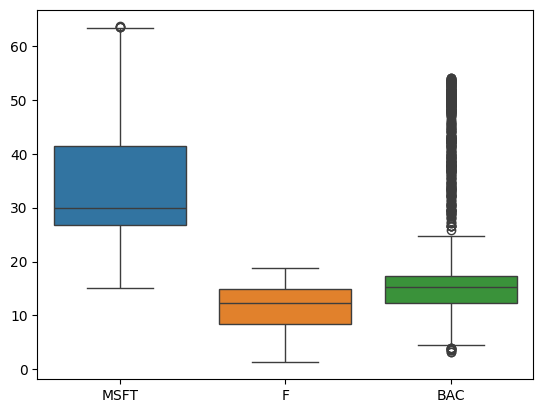

In [ ]:
sns.boxplot(data=stocks)

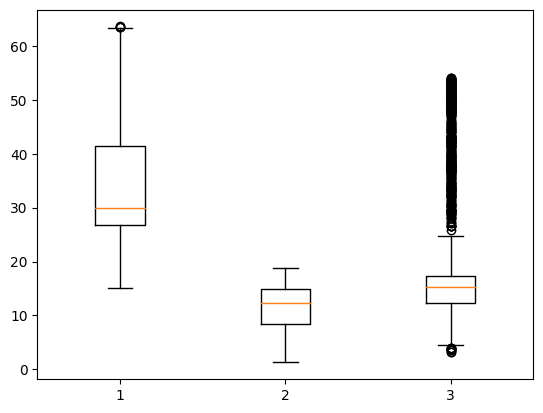

In [ ]:
bp=plt.boxplot(x=stocks)

In [ ]:
#Microsoft
bp['fliers'][0].get_data()[1].shape #Cuantos hay en fliers, valores atipicos obtenidos via matplotlib

(4,)

In [ ]:
#Ford
bp['fliers'][1].get_data()[1].shape #Cuantos hay en fliers, valores atipicos obtenidos via matplotlib

(0,)

In [ ]:
#Banco
bp['fliers'][2].get_data()[1].shape #Cuantos hay en fliers, valores atipicos obtenidos via matplotlib

(441,)

#PCA

In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df,x='sepal_length',y='petal_length',z = 'petal_width',
                    color ='species')
fig.show()

In [ ]:
#Iris es de 4 dimenciones, se usan petalo y sepalo para obtener la mayor dispercion de los datos
import numpy as np
import pandas as pd


In [ ]:
df_wine = pd.read_csv('https://bit.ly/3L1ZZI4',header=None)
df_wine.tail(3)
#Primer columna, tipo de vinos, muy dispares. 13 y 5 valores mas dispersos

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [ ]:
#Separar los datos para entrenamiento y pruebas
from sklearn.model_selection import train_test_split
X,y = df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
#Estandarizar
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)


In [ ]:
#matriz de covarianza y eigenpares
#Recomendable, importaciones hasta el inicio
import numpy as np
cov_mat = np.cov(X_train_std.T) #Transpuesto
eigen_vals,eigen_vecs = np.linalg.eig(cov_mat)
print(f'Eigenvals: {eigen_vals}')


Eigenvals: [4.75299162 2.36828345 1.49727387 0.99965167 0.92553343 0.66561001
 0.50187735 0.37631701 0.10272893 0.15678555 0.3000101  0.21933736
 0.2392907 ]


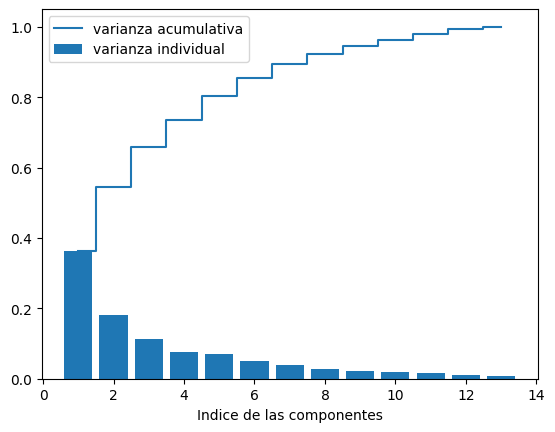

In [ ]:
#Grafica con los aportes de cada eigenval
import matplotlib.pyplot as plt
tot= sum(eigen_vals)
var_exp =[ev/tot for ev in sorted(eigen_vals,reverse =True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1,14),var_exp,label='varianza individual',align='center')
plt.step(range(1,14),cum_var_exp,where = 'mid',label= 'varianza acumulativa')
plt.xlabel('Indice de las componentes')
plt.legend(loc='best')
plt.show()

In [ ]:
#Lista eigenpares
eigen_par = [(np.abs(eigen_vals[i]),eigen_vecs[:,i])
for i in range(len(eigen_vals))]

#Ordenar de forma desc
eigen_par.sort(key=lambda k:k[0],reverse = True)
eigen_par


[(4.752991618851948,
  array([-0.14428357,  0.22251643,  0.0252056 ,  0.26979447, -0.11468111,
         -0.38526282, -0.41472428,  0.32465583, -0.3081322 ,  0.0921365 ,
         -0.30369451, -0.37296659, -0.28722544])),
 (2.368283448434256,
  array([-0.49316932, -0.22304531, -0.29038443,  0.04673621, -0.20830727,
         -0.10139579, -0.00437796, -0.09992264, -0.0631297 , -0.55794369,
          0.24914284,  0.16916111, -0.38842829])),
 (1.4972738663229583,
  array([ 0.20259154, -0.19324717, -0.59950729, -0.54996022,  0.00235015,
         -0.21736067, -0.23002368, -0.17594952, -0.20718322,  0.09143673,
          0.01294773, -0.23565792,  0.14710126])),
 (0.9996516675198036,
  array([-0.24336225, -0.12599672,  0.11880837,  0.03815725,  0.8869835 ,
         -0.17524454, -0.12779911, -0.1738837 ,  0.07101157, -0.08687351,
          0.06120729, -0.17001965, -0.00818789])),
 (0.9255334329565703,
  array([ 0.13320639, -0.53385105,  0.40139344,  0.0533842 , -0.088423  ,
         -0.10554471, 

In [ ]:
# dos 60% de la varianza total
w = np.hstack((eigen_par[0][1][:,np.newaxis], #new axis la segun dimencion explicita
               eigen_par[1][1][:,np.newaxis])) #Apilamiento horizontal
print(f'Matriz {w}:\n')

Matriz [[-0.14428357 -0.49316932]
 [ 0.22251643 -0.22304531]
 [ 0.0252056  -0.29038443]
 [ 0.26979447  0.04673621]
 [-0.11468111 -0.20830727]
 [-0.38526282 -0.10139579]
 [-0.41472428 -0.00437796]
 [ 0.32465583 -0.09992264]
 [-0.3081322  -0.0631297 ]
 [ 0.0921365  -0.55794369]
 [-0.30369451  0.24914284]
 [-0.37296659  0.16916111]
 [-0.28722544 -0.38842829]]:



In [ ]:
#Transformar una muestra 1x13 a 1x2
print(f'Original {X_train_std[0]}')
print(f'Proyectada {X_train_std[0].dot(w)}')

Original [ 0.9645856   0.36848315 -0.19242913  0.79608768 -0.68028463 -1.47756867
 -1.27669348  0.30408655 -0.9240154   1.8581922  -1.13621109 -1.27542186
 -0.41319109]
Proyectada [ 2.82357283 -1.5148456 ]


In [ ]:
#Transformar todo el conjunto de datos
X_train_pca = X_train_std.dot(w) #Todo el conjutno de daos estandarizado es afectado por el producto punto
X_train_std.shape, X_train_pca.shape

((124, 13), (124, 2))

In [ ]:
#Peobar con una regresion logistica
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='auto',solver ='liblinear')
lr.fit(X_train_pca,y_train)

LogisticRegression(solver='liblinear')

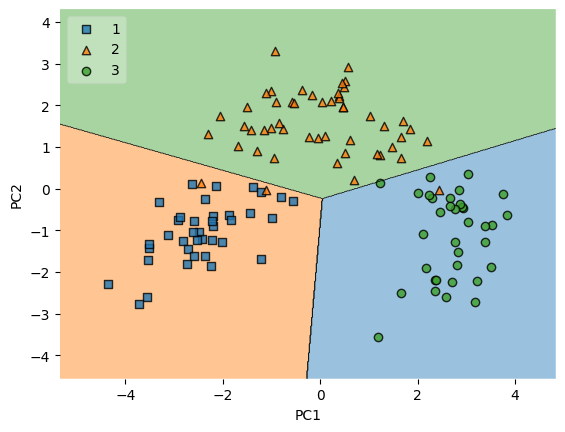

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train_pca,y_train,clf=lr,legend=2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
#modo bootcamp => PCA de sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df_wine = pd.read_csv('https://bit.ly/3L1ZZI4',header=None)
df_wine.tail(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [ ]:
X,y = df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values
#Entrenamiento y pruebas
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
#Estandarizar
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
#Modelos
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
pca=PCA(n_components=2)
lr=LogisticRegression(multi_class='auto',solver='liblinear')
#ajustar y transformar
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca,y_train)

LogisticRegression(solver='liblinear')

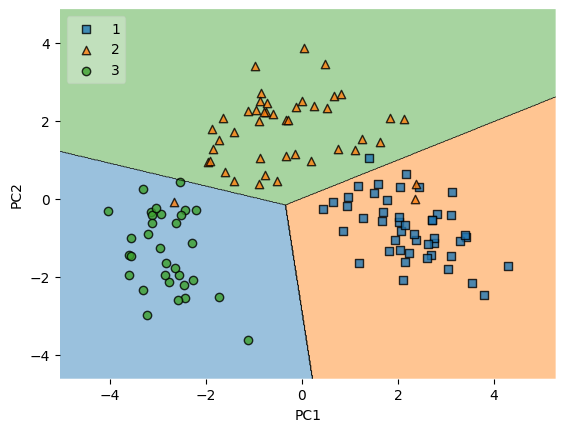

In [ ]:
#Grafica del conjunto de entrenamiento
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train_pca,y_train,clf=lr,legend=2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
#Grafica del conjunto de pruebas
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_test_pca,y_test,clf=lr,legend=2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
#Valor absoluto, eigenvalor, la mayor variabilidad

NameError: name 'X_test_pca' is not defined

In [ ]:
#Si el conjunto de datos es supervisado, es mejor usar LDA
#modo bootcamp => PCA de sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df_wine = pd.read_csv('https://bit.ly/3L1ZZI4',header=None)
df_wine.tail(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [ ]:
X,y = df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values
#Entrenamiento y pruebas
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
#Estandarizar
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
#Modelos
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LinearRegression
lda=LDA(n_components=2)
lr=LogisticRegression()
X_train_lda = lda.fit_transform(X_train_std,y_train)
X_test_lda =lda.transform(X_test_std)
lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

ValueError: X has 2 features, but LinearRegression is expecting 13 features as input.

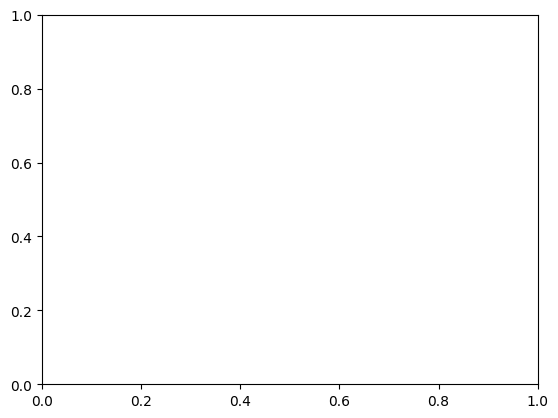

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train_lda,y_train,clf=lr)

ValueError: X has 2 features, but LinearRegression is expecting 13 features as input.

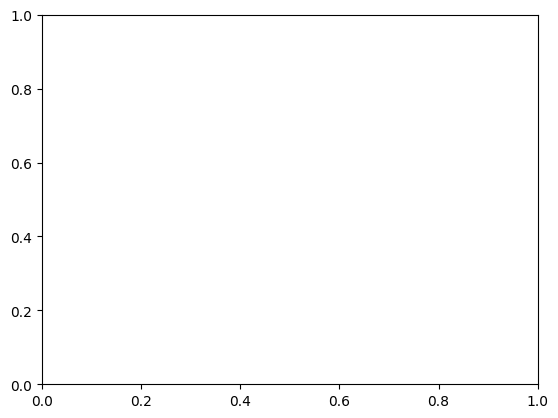

In [ ]:
plot_decision_regions(X_test_lda,y_test,clf=lr)